<center> <h1> Python

Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations


In [312]:
import requests
import json
import pandas as pd
from datetime import datetime


def download_data(url):
    # Send a GET request to the API and retrieve the data
    response = requests.get(url)
    
    if response.status_code == 200:
        data = json.loads(response.text)
        return data
    else:
        print("Failed to download data.")
        

url = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'
data_json = download_data(url)
d1 = data_json['_embedded']['episodes']
# using for loop for transformation of data 
for d in d1:
    try:
        obj = datetime.strptime(d['airtime'] , '%H:%M')
        d['airtime'] = obj.strftime('%I:%M %p').lstrip('0')
        d['airtime'] = datetime.strptime(d['airtime'], '%I:%M %p').time()
        d['airdate'] = datetime.strptime(d['airdate'], '%Y-%M-%d').date()
        d['runtime'] = float(d['runtime'])
        d['summary'] = d['summary'].replace('<p>', '').replace('</p>', '')
        d['medium_image'] = d['image']['medium']
    except Exception as e:
        print("Exception due to date transformation, run program from start")
df['airdate'] = pd.to_datetime(df['airdate'] , format='%Y-%m-%d')
df.dtypes

id                       int64
url                     object
name                    object
season                   int64
number                   int64
type                    object
airdate         datetime64[ns]
airtime                 object
airstamp                object
runtime                float64
image                   object
summary                 object
_links                  object
medium_image            object
rating_num             float64
rating_word             object
dtype: object

In [313]:
df = pd.DataFrame(d1)

In [314]:
df.head(20)

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links,medium_image
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-01-02,21:00:00,2016-10-03T01:00:00+00:00,68.0,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,A woman named Dolores is a free spirit in the ...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-01-09,21:00:00,2016-10-10T01:00:00+00:00,60.0,{'average': 7.7},{'medium': 'https://static.tvmaze.com/uploads/...,Bernard suspects that someone is sabotaging th...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-01-16,21:00:00,2016-10-17T01:00:00+00:00,60.0,{'average': 7.6},{'medium': 'https://static.tvmaze.com/uploads/...,Bernard continues to investigate Dolores' supp...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-01-23,21:00:00,2016-10-24T01:00:00+00:00,60.0,{'average': 7.9},{'medium': 'https://static.tvmaze.com/uploads/...,While Dolores joins William and Logan on their...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-01-30,21:00:00,2016-10-31T01:00:00+00:00,60.0,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,Dolores takes the first step on her path of di...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-01-06,21:00:00,2016-11-07T02:00:00+00:00,60.0,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,"While Maeve convinces Felix to show her ""upsta...",{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-01-13,21:00:00,2016-11-14T02:00:00+00:00,60.0,{'average': 8.6},{'medium': 'https://static.tvmaze.com/uploads/...,While William and Dolores travel to the unclai...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...
7,943065,https://www.tvmaze.com/episodes/943065/westwor...,Trace Decay,1,8,regular,2016-01-20,21:00:00,2016-11-21T02:00:00+00:00,60.0,{'average': 7.9},{'medium': 'https://static.tvmaze.com/uploads/...,Bernard tries to cope with what he did under R...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-01-27,21:00:00,2016-11-28T02:00:00+00:00,60.0,{'average': 8.5},{'medium': 'https://static.tvmaze.com/uploads/...,Bernard forces Robert to take him back into hi...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-01-04,21:00:00,2016-12-05T02:00:00+00:00,90.0,{'average': 8.7},{'medium': 'https://static.tvmaze.com/uploads/...,Delores finds out the truth about William's fa...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...


## ● Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.


In [315]:
# we are converting rating dictionary to rating word and rating num for better understanding to algorithm

df['rating_num'] = [j for i in df['rating'] for j in i.values()]
df['rating_word'] = [j for i in df['rating'] for j in i.keys()]

df.drop('rating', axis = 1 , inplace = True)

In [316]:
df.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,image,summary,_links,medium_image,rating_num,rating_word
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-01-02,21:00:00,2016-10-03T01:00:00+00:00,68.0,{'medium': 'https://static.tvmaze.com/uploads/...,A woman named Dolores is a free spirit in the ...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...,8.0,average
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-01-09,21:00:00,2016-10-10T01:00:00+00:00,60.0,{'medium': 'https://static.tvmaze.com/uploads/...,Bernard suspects that someone is sabotaging th...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...,7.7,average
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-01-16,21:00:00,2016-10-17T01:00:00+00:00,60.0,{'medium': 'https://static.tvmaze.com/uploads/...,Bernard continues to investigate Dolores' supp...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...,7.6,average
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-01-23,21:00:00,2016-10-24T01:00:00+00:00,60.0,{'medium': 'https://static.tvmaze.com/uploads/...,While Dolores joins William and Logan on their...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...,7.9,average
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-01-30,21:00:00,2016-10-31T01:00:00+00:00,60.0,{'medium': 'https://static.tvmaze.com/uploads/...,Dolores takes the first step on her path of di...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...,8.0,average


<Axes: xlabel='season', ylabel='rating_num'>

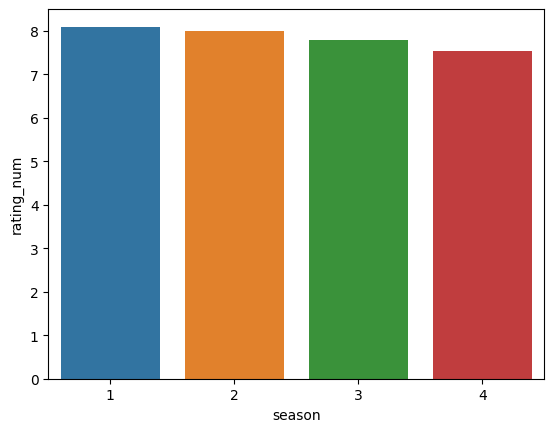

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns
season_data = pd.DataFrame(df.groupby('season')['rating_num'].mean())
sns.barplot(data = season_data , x = season_data.index , y = 'rating_num')


## ● Get all the episode names, whose average rating is more than 8 for every season

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "Trompe L'Oeil"),
  Text(1, 0, 'The Well-Tempered Clavier'),
  Text(2, 0, 'The Bicameral Mind'),
  Text(3, 0, 'Kiksuya'),
  Text(4, 0, 'Vanishing Point'),
  Text(5, 0, 'The Passenger')])

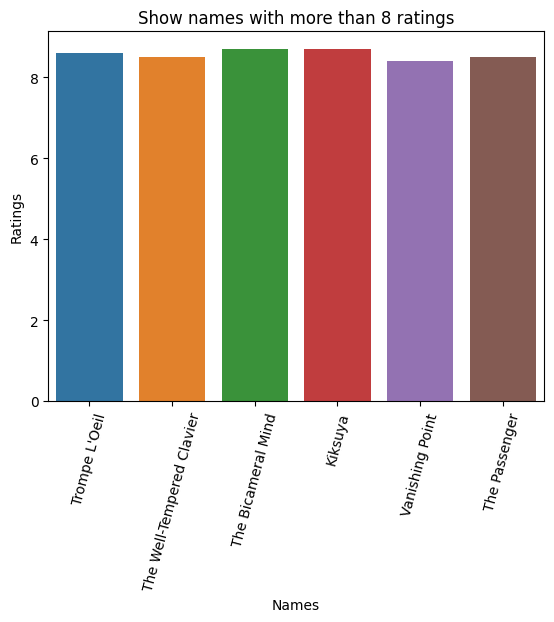

In [318]:
a = df[df['rating_num']>8]
sns.barplot(a , x = 'name' , y = 'rating_num' )
plt.xlabel('Names')
plt.ylabel('Ratings')
plt.title('Show names with more than 8 ratings')
plt.xticks(rotation = 75)

## ● Get all the episode names that aired before May 2019


In [319]:

for i in range(0 , len(df['airdate'])):
    if df['airdate'][i]< datetime(2019,5,1).date():
        print(df['name'][i])


The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger


## ● Get the episode name from each season with the highest and lowest rating


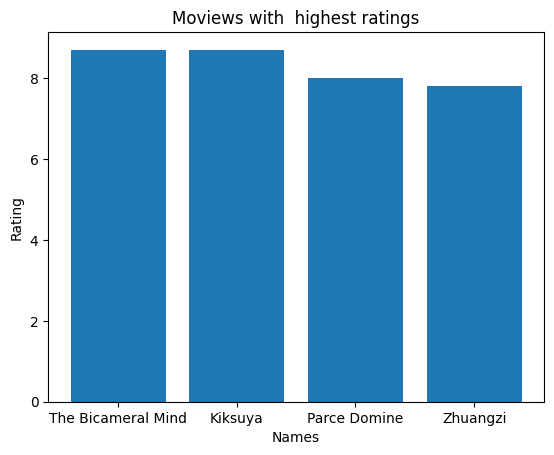

In [320]:
my_dict = dict()
my_dict1 = dict()
for i in range(1 , len(df['season'].unique())+1):
    highest_rating = 0
    lowest_rating = 10
    for j in range(0 , len(df)):
        if df['season'][j]==i:
            if df['rating_num'][j] > highest_rating:
                highest_rating = df['rating_num'][j]
                show = df['name'][j]
            if df['rating_num'][j] < lowest_rating:
                lowest_rating = df['rating_num'][j]
                show1 = df['name'][j]
    my_dict[show] = highest_rating 
    my_dict1[show1] = lowest_rating
                
    # print(f'highest_rating for season {i} is {highest_rating} with show name {show}')
    # print(f'lowest_rating for season {i} is {lowest_rating} with show name {show1}')
    
plt.bar(my_dict.keys() , my_dict.values())
plt.xlabel('Names')
plt.ylabel('Rating')
plt.title('Moviews with  highest ratings')
plt.show()

## Get the summary for the most popular ( ratings ) episode in every season


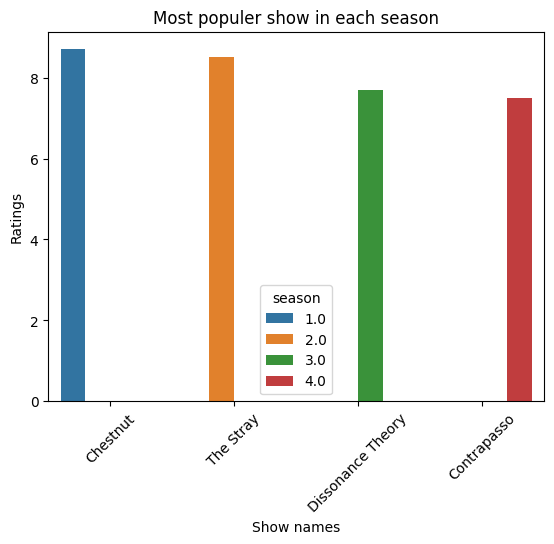

In [359]:
my_dict3 = dict()
for i in range(1 , len(df['season'].unique())+1):
    highest_rating = 0
    for j in range(0 , len(df)):
        if df['season'][j]==i:
            if df['rating_num'][j] > highest_rating:
                my_dict3[df['name'][i]] = [df['rating_num'][j] , i]
my_df = pd.DataFrame.from_dict(my_dict3)

my_df = my_df.T
my_df = my_df.rename(columns={0:'rating' , 1:'season'})
ax = sns.barplot(my_df , x = my_df.index , y = 'rating' , hue = 'season')
ax.set_title('Most populer show in each season')
ax.set_xlabel('Show names')
ax.set_ylabel('Ratings')
plt.xticks(rotation = 45)
plt.show()